### Detect and Crop face
1. Accept a color image.
2. Convert the image to grayscale.
3. Detect and crop the face contained in the image.

In [71]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

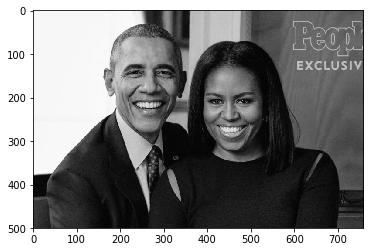

In [83]:
# Accept image and convert into grayscale
imagefile = "obamas.jpg"
img = cv2.imread(imagefile)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)
img_rgb_copy = np.copy(img_rgb)
img_gray_copy = np.copy(img_gray)

plt.imshow(img_gray, cmap='gray')

(2, 4)


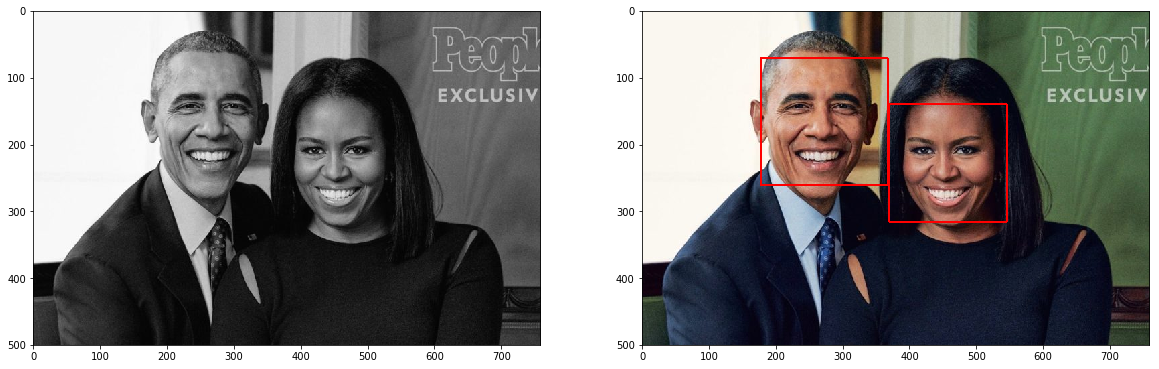

In [84]:
# Detect and crop faces
face_cascade = cv2.CascadeClassifier('detector_architectures/haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(img_gray_copy, 1.06, 5)
for x,y,w,h in faces:
    cv2.rectangle(img_rgb_copy, (x,y), (x+w+10, y+h+10), (255,0,0), 2)

f, (ax1,ax2) = plt.subplots(1,2, figsize=(20,10))
ax1.imshow(img_gray_copy, cmap='gray')
ax2.imshow(img_rgb_copy)
print(faces.shape)

In [87]:
#plt.imshow(img_gray_copy, cmap='gray')
#im = img_gray_copy[y:y+h, x:x+w]
#plt.imshow(im, cmap='gray')
from matplotlib import gridspec

def draw_faces(faces, image):
    index = 0
    gs = gridspec.GridSpec(1, 2)
    fig = plt.figure(figsize=(10,10))
    for x,y,w,h in faces:
        im = image[y:y+h, x:x+w]
        ax = fig.add_subplot(gs[index])
        ax.imshow(im)
        if index < faces.shape[0]:
            index += 1


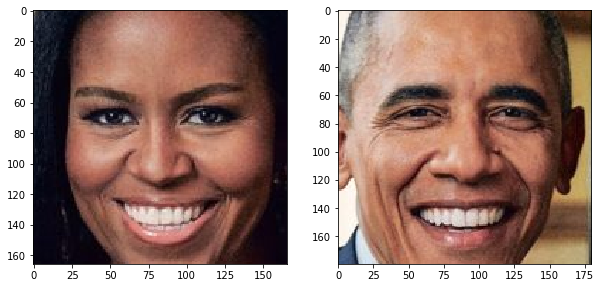

In [86]:
draw_faces(faces, img_rgb)